In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from underthesea import word_tokenize, pos_tag, sent_tokenize
import warnings
from gensim import corpora, models, similarities
import jieba
import re

- Đọc dữ liệu:

In [2]:
products = pd.read_csv('Products.csv', encoding = 'utf-8')
products.head()

,index,item_id,name,description,rating,price,list_price,brand,group,url,image
0,0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [3]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370 entries, 0 to 4369
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        4370 non-null   int64  
 1   item_id      4370 non-null   int64  
 2   name         4370 non-null   object 
 3   description  4370 non-null   object 
 4   rating       4370 non-null   float64
 5   price        4370 non-null   int64  
 6   list_price   4370 non-null   int64  
 7   brand        4370 non-null   object 
 8   group        4370 non-null   object 
 9   url          4370 non-null   object 
 10  image        4370 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 375.7+ KB


- Tạo tính năng mới:

In [4]:
products['name_description'] = products['name'] + products['description']

In [5]:
products.head(2)

,index,item_id,name,description,rating,price,list_price,brand,group,url,image,name_description
0,0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...
1,1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...,Tai nghe bluetooth không dây F9 True wireless ...


In [6]:
products['name_description_pre'] = products['name_description'].apply(lambda x: word_tokenize(x, format = 'text'))

In [7]:
products.head(2)

,index,item_id,name,description,rating,price,list_price,brand,group,url,image,name_description,name_description_pre
0,0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,Tai_nghe Bluetooth_Inpods 12 - Cảm_biến vân ta...
1,1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...,Tai nghe bluetooth không dây F9 True wireless ...,Tai_nghe bluetooth không dây F9_True wireless ...


- Vectorizer hoá văn bản Tiếng Việt:

In [8]:
stopwords_file = 'vietnamese-stopwords.txt'

with open(stopwords_file, 'r', encoding = 'utf-8') as file:
    stopwords = file.read()
stopwords = stopwords.split('\n')

In [9]:
tf = TfidfVectorizer(analyzer = 'word', min_df = 0, stop_words = stopwords)

In [10]:
tfidf_matrix = tf.fit_transform(products['name_description_pre'])

- Ta sẽ áp dụng hệ thống đề xuất sản phẩm với 2 hướng tiếp cận: `Cosine Similarity` và `Gensim`

# 1. Consine Similarity Approach

In [11]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_similarities

array([[1.        , 0.40075346, 0.08112324, ..., 0.01782164, 0.01366667,
        0.06182976],
       [0.40075346, 1.        , 0.08310518, ..., 0.01635142, 0.0362413 ,
        0.09042972],
       [0.08112324, 0.08310518, 1.        , ..., 0.03441329, 0.03081951,
        0.06934047],
       ...,
       [0.01782164, 0.01635142, 0.03441329, ..., 1.        , 0.00868335,
        0.03151153],
       [0.01366667, 0.0362413 , 0.03081951, ..., 0.00868335, 1.        ,
        0.05662914],
       [0.06182976, 0.09042972, 0.06934047, ..., 0.03151153, 0.05662914,
        1.        ]])

In [12]:
results = {}

for idx, row in products.iterrows():    
    similar_indices = cosine_similarities[idx].argsort()[:-10:-1]
    similar_items = [(cosine_similarities[idx][i], products['item_id'][i]) for i in similar_indices]
    results[row['item_id']] = similar_items[1:]

In [13]:
def product_recommend(item_id, num_product):
    id_rec = []
    name_rec = []
    scores = []
    recs = results[item_id][: num_product]
    for rec in recs:
        id_rec.append(rec[1])
        product_name = products.loc[products['item_id'] == rec[1], 'name'].tolist()[0].split('-')[0]
        name_rec.append(product_name)
        scores.append(round(rec[0], 2))
    df_rec = pd.DataFrame({'ID Recommend': id_rec, 'Product name': name_rec, 'Score': scores})
    return df_rec

In [14]:
product_recommend(48102821, 5)

,ID Recommend,Product name,Score
0,56365197,"Tai nghe bluetooth không dây i12 TWS 5.0, thiế...",0.46
1,22413470,Tai Nghe Bluetooth Air.podes Cảm Ứng Công Nghệ...,0.43
2,48273751,Tai nghe Blutooth 5.0 kiêm dock sạc dự phòng,0.41
3,70772235,Tai nghe bluetooth nhét tai không dây tai phon...,0.41
4,50319688,Tai Nghe Bluetooth Mini I12 Tws V5.0 (Trắng) N...,0.40


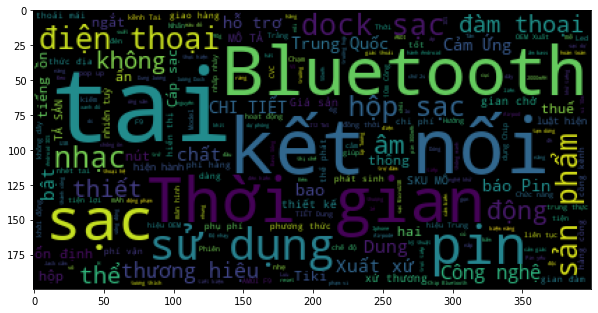

In [15]:
from wordcloud import WordCloud

def get_product_text(item_id):
    recs_index = [rec[1] for rec in results[item_id]] + [item_id]
    text = products[products['item_id'].map(lambda x: x in recs_index)]
    return ''.join(text['name'] + text['description'])

wc_text = get_product_text(48102821)

plt.figure(figsize=(10, 6))
wc = WordCloud(stopwords = stopwords).generate(wc_text)
plt.imshow(wc);

# 2. Gensim Approach

In [16]:
products_gen = [[text for text in x.split()] for x in products['name_description_pre']]
products_re = [[t.lower() for t in text if not t in [' ', ',', '.', '...', ':', ';', '?', '\d+']] for text in products_gen]
products_re = [[t for t in text if not t in stopwords] for text in products_re]

In [17]:
dictionary = corpora.Dictionary(products_re)
feature_cnt = len(dictionary.token2id)
feature_cnt

51825

In [18]:
corpus = [dictionary.doc2bow(text) for text in products_re]

tfidf = models.TfidfModel(corpus)
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features = feature_cnt)

In [19]:
def recommender(item_id, dictionary, tfidf, index, num):
    view_product = products.loc[products['item_id'] == item_id, 'name_description_pre'].to_string(index = False)
    view_product = view_product.lower().split()
    kw_vector = dictionary.doc2bow(view_product)
    sim = index[tfidf[kw_vector]]
    
    list_id = []
    scores = []
    for i in range(len(sim)):
        list_id.append(i)
        scores.append(sim[i])
    df_rs = pd.DataFrame({'id': list_id, 'Scores': scores})
    top_rec = df_rs.sort_values(by = 'Scores', ascending = False).head(num)
    idx = list(top_rec['id'])
    product_rec = products.loc[products.index.map(lambda x: x in idx), ['index', 'item_id', 'name']]
    df_final = pd.concat([product_rec, top_rec], axis = 1).sort_values(by = 'Scores', ascending = False)
    df_final = df_final[df_final['item_id'] != item_id]
    return df_final

In [20]:
item_id = 48273751
recommender(item_id, dictionary, tfidf, index, 6)

,index,item_id,name,id,Scores
378,378,50817650,"Tai nghe chơi game, nghe nhạc KIÊM PIN SẠC DỰ ...",378,0.299980
131,131,14868418,Tai Nghe Bluetooth Không Dây QCY-T1 Mini Hàng ...,131,0.295939
134,134,56885678,Tai Nghe Bluetooth TWS F9 Tai Nghe Nhét Hai T...,134,0.295181
639,639,56365197,"Tai nghe bluetooth không dây i12 TWS 5.0, thiế...",639,0.274036
516,516,16860936,Tai Nghe Không Dây QCY-T2C - Hàng Chính Hãng,516,0.261148


# 3. Kết luận:

- Cả hai hướng tiếp cận đều đề xuất các sản phẩm khá tương đồng với sản phẩm đã lựa chọn.